# Step1:import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Step2: Load the Dataset

In [2]:
data=pd.read_csv('test_diabetes.csv')


# Step 3:EDA [Exploratory Data Analysis]

In [3]:
#1.Head of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148.0,72.0,35.0,0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168,43.1,2.288,NaN,1


In [4]:
#2.shape of the dataset
data.shape

(768, 9)

In [5]:
#3.Information and type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               731 non-null    float64
 1   Glucose                   730 non-null    float64
 2   BloodPressure             734 non-null    float64
 3   SkinThickness             734 non-null    float64
 4   Insulin                   717 non-null    object 
 5   BMI                       733 non-null    float64
 6   DiabetesPedigreeFunction  728 non-null    float64
 7   Age                       717 non-null    float64
 8   Outcome                   768 non-null    object 
dtypes: float64(7), object(2)
memory usage: 54.1+ KB


In [6]:
#.replace column values of Insulin and Outcome
data['Insulin']=data['Insulin'].replace(['Zero',0])
data['Outcome']=data['Outcome'].replace(['N','Y'],[0,1])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               731 non-null    float64
 1   Glucose                   730 non-null    float64
 2   BloodPressure             734 non-null    float64
 3   SkinThickness             734 non-null    float64
 4   Insulin                   677 non-null    object 
 5   BMI                       733 non-null    float64
 6   DiabetesPedigreeFunction  728 non-null    float64
 7   Age                       717 non-null    float64
 8   Outcome                   768 non-null    object 
dtypes: float64(7), object(2)
memory usage: 54.1+ KB


In [7]:
data.head(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148.0,72.0,35.0,0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168,43.1,2.288,NaN,1
5,5.0,116.0,74.0,NaN,168,25.6,0.201,30.0,0
6,3.0,78.0,50.0,32.0,88,31.0,0.248,26.0,1
7,NaN,NaN,0.0,0.0,88,35.3,0.134,29.0,0
8,2.0,197.0,70.0,45.0,543,30.5,0.158,53.0,1
9,8.0,125.0,NaN,0.0,543,0.0,0.232,54.0,1


In [8]:
#4.Missing value checking
data.isnull().sum()*100/768

Pregnancies                  4.817708
Glucose                      4.947917
BloodPressure                4.427083
SkinThickness                4.427083
Insulin                     11.848958
BMI                          4.557292
DiabetesPedigreeFunction     5.208333
Age                          6.640625
Outcome                      0.000000
dtype: float64

In [9]:
#4.1 Handling Missing Data 
#Using Median
data['Pregnancies'].fillna(data['Pregnancies'].median(),inplace=True)
data['Glucose'].fillna(data['Glucose'].median(),inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].median(),inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].median(),inplace=True)
data['Insulin'].fillna(data['Insulin'].median(),inplace=True)
data['BMI'].fillna(data['BMI'].median(),inplace=True)
data['DiabetesPedigreeFunction'].fillna(data['DiabetesPedigreeFunction'].median(),inplace=True)
data['Age'].fillna(data['Age'].median(),inplace=True)

In [11]:
data.isnull().sum()*100/768

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [10]:
#5.Statistical summary
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.785156,120.946615,69.140625,20.944010,31.980469,0.467483,33.769531
std,3.291875,30.990784,19.068969,15.527097,7.735926,0.323716,15.626516
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,-1.000000
25%,1.000000,100.000000,64.000000,0.000000,27.500000,0.251000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,0.372500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,36.225000,0.602000,40.000000
max,17.000000,198.000000,122.000000,99.000000,67.100000,2.420000,200.000000


In [11]:
##convrsion of Object datatype to numerical
data = data.astype({"Insulin":'int64', "Outcome":'int64'})

# 3.1.Data Cleaning


In [12]:
##1.Drop the Duplicates
data.drop_duplicates()
data.shape

(768, 9)

In [13]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3.0,148.0,72.0,35.0,0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21.0,0
4,0.0,117.0,40.0,35.0,168,43.1,2.288,29.0,1


In [14]:
##2.Check the null values
print('Number of Null values in Glucose:',data[data['Glucose']==0].shape[0])
print('Number of Null values in BloodPressure:',data[data['BloodPressure']==0].shape[0])
print('Number of Null values in SkinThickness:',data[data['SkinThickness']==0].shape[0])
print('Number of Null values in BMI:',data[data['BMI']==0].shape[0])

Number of Null values in Glucose: 4
Number of Null values in BloodPressure: 35
Number of Null values in SkinThickness: 209
Number of Null values in BMI: 11


In [15]:
##2. Replace the null values with mean value
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())


In [18]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.785156,121.576545,72.291565,26.643617,155.791667,32.438522,0.467483,33.769531,0.348958
std,3.291875,29.727834,11.642260,9.435814,107.753913,6.705713,0.323716,15.626516,0.476951
min,0.000000,44.000000,30.000000,7.000000,0.000000,18.200000,0.078000,-1.000000,0.000000
25%,1.000000,100.000000,65.000000,20.944010,90.000000,27.775000,0.251000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,130.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,190.000000,36.225000,0.602000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,200.000000,1.000000


# Data Visualizualion

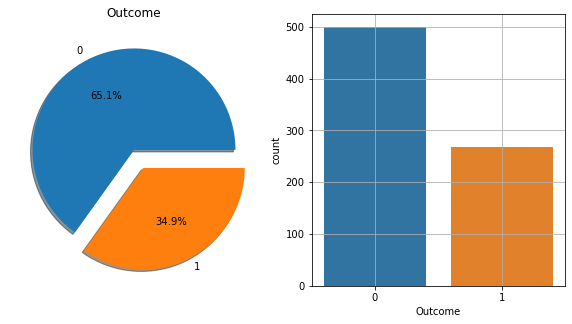

In [16]:
##Count Plot
f,ax=plt.subplots(1,2,figsize=(10,5))
data['Outcome'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=data,ax=ax[1])
N,P=data['Outcome'].value_counts()
plt.grid()
plt.show()

In [17]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

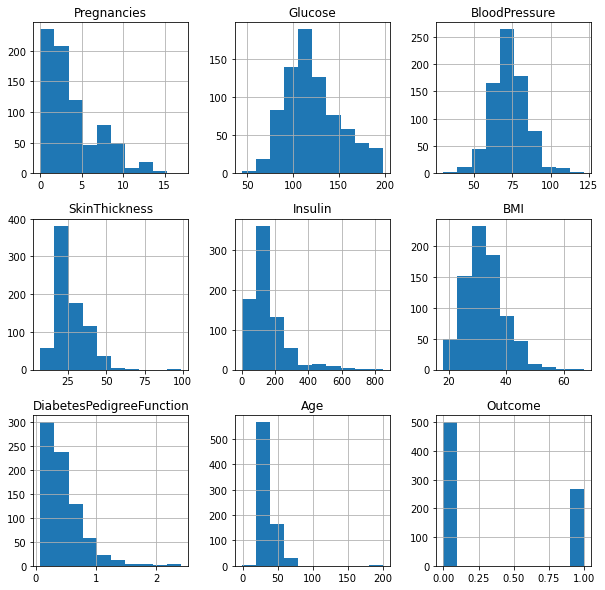

In [18]:
##.Histogram for evaluating whether the data is normally distributed or not
data.hist(bins=10,figsize=(10,10))
plt.show()

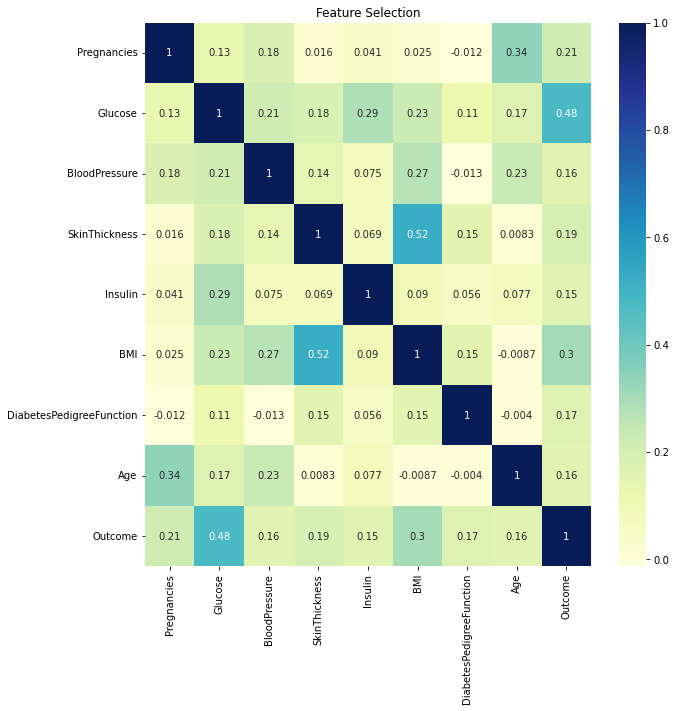

In [19]:
##Heatmap
##Analyzing the relationship between dependent variable and independent variable
plt.figure(figsize=(10,10))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap="YlGnBu")
plt.title('Feature Selection')
plt.show()

##### Seperate x and Y values

In [20]:
x=data.drop(['Pregnancies','Insulin','Outcome'],axis=1)
x.shape

(768, 6)

In [21]:
y=data.iloc[:,-1]
y.shape

(768,)

### Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

### Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [24]:
x_train.shape,x_test.shape

((614, 6), (154, 6))

In [25]:
y_train.shape,y_test.shape

((614,), (154,))

## Modelling

### 1.Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lsr=LogisticRegression()
lsr.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred=lsr.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [28]:
print("Accuracy score=",accuracy_score(y_test,y_pred)*100)

Accuracy score= 75.32467532467533


In [29]:
print("Accuracy score of Training data=",lsr.score(x_train,y_train)*100)
print("Accuracy score of Training data=",lsr.score(x_test,y_test)*100)

Accuracy score of Training data= 75.8957654723127
Accuracy score of Training data= 75.32467532467533


In [30]:
##confusion matrix evaluation

cm=confusion_matrix(y_test,y_pred)
cm

array([[94, 15],
       [23, 22]], dtype=int64)

### 2.Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc=RandomForestClassifier(n_estimators=5,random_state=2)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [45]:
y_pred=rfc.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [46]:
print("Accuracy score=",accuracy_score(y_test,y_pred)*100)

Accuracy score= 75.32467532467533


In [47]:
print("Accuracy score of Training data=",rfc.score(x_train,y_train)*100)
print("Accuracy score of Training data=",rfc.score(x_test,y_test)*100)

Accuracy score of Training data= 96.74267100977198
Accuracy score of Training data= 75.32467532467533


In [36]:
##confusion matrix evaluation

cm=confusion_matrix(y_test,y_pred)
cm

array([[89, 20],
       [18, 27]], dtype=int64)

### 3.SVC

In [48]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [49]:
y_pred=svc.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [50]:
print("Accuracy score=",accuracy_score(y_test,y_pred)*100)

Accuracy score= 77.92207792207793


In [51]:
print("Accuracy score of Training data=",svc.score(x_train,y_train)*100)
print("Accuracy score of Training data=",svc.score(x_test,y_test)*100)

Accuracy score of Training data= 76.8729641693811
Accuracy score of Training data= 77.92207792207793


In [52]:
##confusion matrix evaluation

cm=confusion_matrix(y_test,y_pred)
cm

array([[98, 11],
       [23, 22]], dtype=int64)

### 4.Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
clfr=DecisionTreeClassifier(random_state=2)
clfr.fit(x_train,y_train)

DecisionTreeClassifier(random_state=2)

In [54]:
y_pred=clfr.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [55]:
print("Accuracy score=",accuracy_score(y_test,y_pred)*100)

Accuracy score= 68.18181818181817


In [56]:
print("Accuracy score of Training data=",clfr.score(x_train,y_train)*100)
print("Accuracy score of Training data=",clfr.score(x_test,y_test)*100)

Accuracy score of Training data= 100.0
Accuracy score of Training data= 68.18181818181817


In [57]:
##confusion matrix evaluation

cm=confusion_matrix(y_test,y_pred)
cm

array([[77, 32],
       [17, 28]], dtype=int64)

### 5.KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=2)
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [59]:
y_pred=kn.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [60]:
print("Accuracy score=",accuracy_score(y_test,y_pred)*100)

Accuracy score= 68.83116883116884


In [61]:
print("Accuracy score of Training data=",kn.score(x_train,y_train)*100)
print("Accuracy score of Training data=",kn.score(x_test,y_test)*100)

Accuracy score of Training data= 81.59609120521174
Accuracy score of Training data= 68.83116883116884


In [62]:
##confusion matrix evaluation

cm=confusion_matrix(y_test,y_pred)
cm

array([[95, 14],
       [34, 11]], dtype=int64)

### 6.Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [64]:
y_pred=gnb.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [65]:
print("Accuracy score=",accuracy_score(y_test,y_pred)*100)

Accuracy score= 74.02597402597402


In [66]:
print("Accuracy score of Training data=",gnb.score(x_train,y_train)*100)
print("Accuracy score of Training data=",gnb.score(x_test,y_test)*100)

Accuracy score of Training data= 75.0814332247557
Accuracy score of Training data= 74.02597402597402


In [67]:
##confusion matrix evaluation

cm=confusion_matrix(y_test,y_pred)
cm

array([[91, 18],
       [22, 23]], dtype=int64)

## Ensemble Technique

### Bagging

In [68]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(max_samples=100,bootstrap=True)
bc.fit(x_train,y_train)

BaggingClassifier(max_samples=100)

In [69]:
y_pred=bc.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [70]:
print("Accuracy score=",accuracy_score(y_test,y_pred)*100)

Accuracy score= 75.32467532467533


In [71]:
print("Accuracy score of Training data=",bc.score(x_train,y_train)*100)
print("Accuracy score of Training data=",bc.score(x_test,y_test)*100)

Accuracy score of Training data= 78.82736156351791
Accuracy score of Training data= 75.32467532467533


In [72]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [73]:
y_pred=svc.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [74]:
print("Accuracy score=",accuracy_score(y_test,y_pred)*100)

Accuracy score= 77.92207792207793


In [76]:
print("Accuracy score of Training data=",svc.score(x_train,y_train)*100)
print("Accuracy score of Training data=",svc.score(x_test,y_test)*100)

Accuracy score of Training data= 76.8729641693811
Accuracy score of Training data= 77.92207792207793


### Adaboosting

In [77]:
from sklearn.ensemble import AdaBoostClassifier

In [78]:
adaboost=AdaBoostClassifier(learning_rate=1)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1)

In [79]:
y_pred=adaboost.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [80]:
print('Accuracy Score=',accuracy_score(y_test,y_pred)*100)

Accuracy Score= 74.67532467532467


In [81]:
print('Training Adaboost Accurcy=',adaboost.score(x_train,y_train)*100)
print('Testing Adaboost Accurcy=',adaboost.score(x_test,y_test)*100)

Training Adaboost Accurcy= 83.22475570032573
Testing Adaboost Accurcy= 74.67532467532467


### Cross Validation

In [88]:
################k fold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold=KFold(10)#######10 iteration

In [89]:
final=cross_val_score(svc,x,y,cv=kfold)
final

array([0.71428571, 0.80519481, 0.74025974, 0.64935065, 0.77922078,
       0.80519481, 0.83116883, 0.83116883, 0.71052632, 0.75      ])

In [90]:
np.mean(final)

0.761637047163363

# # ***Conclusion***


## Making A predictive System

In [94]:
##making a predictive system
import numpy as np
input_data=(148,72,35,33.6,.627,50)
##changing the input data to numpy array
input_data_as_numpy_aaray=np.asarray(input_data)
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_aaray.reshape(1,-1)
prediction = svc.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


In [95]:
##saving the trained model
import pickle

In [96]:
filename = 'trained_model.pick'
pickle.dump(svc,open(filename,'wb'))##writing binary

In [97]:
##loading the saved model
loaded_model=pickle.load(open('trained_model.pick','rb'))#reading the binary

In [99]:
import numpy as np
input_data=(99,84,0,35.4,0.388,50)
##changing the input data to numpy array
input_data_as_numpy_aaray=np.asarray(input_data)
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_aaray.reshape(1,-1)
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic
